In [1]:
import pandas as pd
import numpy as np
import os as path
import matplotlib.pyplot as plt
from datetime import datetime as dt

Defining data source:

In [2]:
#path.chdir("D:\My Docs\Studies\Singapore Uni of Social Science (SUSS)\Jul'22 registration\Study Materials\ANL252\TMA")
#path.getcwd()
df_staff = pd.read_csv("TMA_Data.csv")

Create attrition pivot table and corresponding chart:

                  ID      
Gender             F    M 
Unit                      
Admin            4.0   3.0
C-Level          1.0   NaN
Engineering      5.0   5.0
IT              18.0  23.0
Manufacturing  105.0  64.0
Sales           11.0  11.0


[]

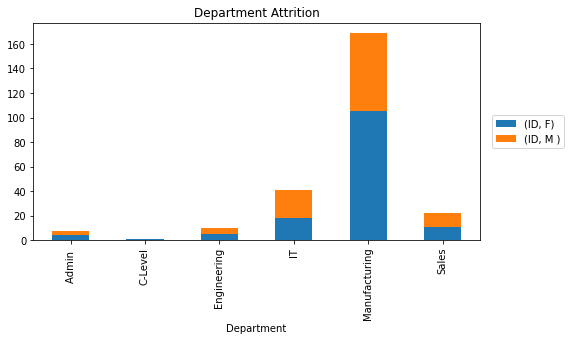

In [3]:
attrit_pvtbl = pd.pivot_table(df_staff, index=["Unit"], columns=["Gender"], values=["ID"], aggfunc="count")
print(attrit_pvtbl)
ax = attrit_pvtbl.plot.bar(stacked=True, title="Department Attrition", figsize=(8,4), xlabel="Department")
ax.legend(loc="right",bbox_to_anchor=(1.2,0.5))
ax.plot()

Create employee response and corresponding chart

               Absence  Satisfaction  Survey
Unit                                        
Admin               55           3.6     4.6
C-Level             10           3.0     4.8
Engineering         94           4.2     4.0
IT                 435           4.0     4.2
Manufacturing     1701           3.9     4.2
Sales              283           4.2     4.0


[]

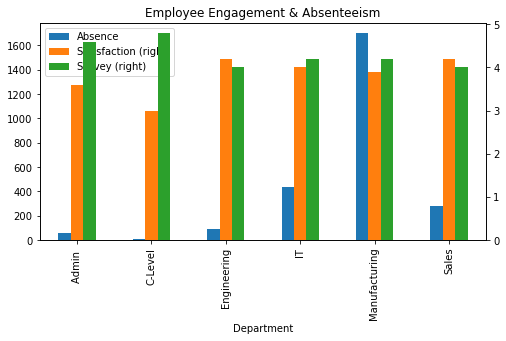

In [4]:
resp_pvtbl = pd.pivot_table(df_staff, index=["Unit"], values=["Absence", "Satisfaction", "Survey"], aggfunc={"Absence":np.sum, "Satisfaction":np.mean, "Survey":np.mean})
resp_pvtbl = resp_pvtbl.round(decimals = 1)
print(resp_pvtbl)
ax = resp_pvtbl.plot.bar(stacked=False, title="Employee Engagement & Absenteeism", figsize=(8,4), secondary_y=["Satisfaction", "Survey"], xlabel="Department")
ax.plot()

Finding the length of service of staff and the minimum, maximum and average length of service:

In [5]:
nowdate = dt(2022,5,1).date()
length_col = []

#loop through entire dataframe. using timedelta to compute day differences and convert to years
for i in range(len(df_staff)):
    if(pd.isnull(df_staff.iloc[i]["LeftDate"]) == True):
        #need to specify the order of day, month, year according to the actual order within "JoinDate" column
        timedelta = nowdate - dt.strptime(df_staff.iloc[i]["JoinDate"],"%m/%d/%Y").date()
        length_col.append(round(timedelta.days/365,1))
    else:
        #need to specify the order of day, month, year according to the actual order within "LeftDate" column
        timedelta = dt.strptime(df_staff.iloc[i]["LeftDate"],"%m/%d/%Y").date() - dt.strptime(df_staff.iloc[i]["JoinDate"],"%m/%d/%Y").date()
        length_col.append(round(timedelta.days/365,1))

#adding service length as new column to right most column of dataframe
df_staff["ServiceLength"] = length_col

print("Minimum length of service is {} year(s)".format(df_staff["ServiceLength"].min(axis=0)))
print("Maximum length of service is {} year(s)".format(df_staff["ServiceLength"].max(axis=0)))
print("Average length of service is {:.1f} year(s)".format(df_staff["ServiceLength"].mean(axis=0)))

Minimum length of service is 0.1 year(s)
Maximum length of service is 16.3 year(s)
Average length of service is 6.8 year(s)


In [7]:
proceed = "Y"

while(proceed == "Y" or proceed == "y"):
    name_query = input("Full name of person to search: ")
    
    for j in range(len(df_staff)):
        if(name_query.lower() == df_staff.loc[j]["Staff"].lower()):
            print("Details retrieved...")
            print(df_staff.loc[j])
            break
        elif(j == len(df_staff)-1):
            print("Staff not found.")
        #else not require because "Staff not found" response to show only when all record search through with no match.
        #extreme condition when at last record with all prior staff names not matching, the last record is also no match.
        
    proceed = input("Press Y or y to continue querying. Press any other keys to quit.")

print("Stop querying.")

Full name of person to search: 
Staff not found.
Press Y or y to continue querying. Press any other keys to quit.Y
Full name of person to search: Anish Hoover
Details retrieved...
ID                            18
Staff               Anish Hoover
BirthYear               1/7/1988
Gender                        M 
Marital                 Divorced
Citizenship              Citizen
Minority                      No
JoinDate                1/5/2015
LeftDate                     NaN
Unit                          IT
Salary                     50178
PerformanceScore            Meet
Survey                       5.0
Satisfaction                   5
Absence                       16
ServiceLength                7.3
Name: 17, dtype: object
Press Y or y to continue querying. Press any other keys to quit.Y
Full name of person to search: Anish
Staff not found.
Press Y or y to continue querying. Press any other keys to quit.Y
Full name of person to search: anish hoover
Details retrieved...
ID               